In [3]:
import pandas as pd
import os


In [1]:
id = '78186' #this is the part x_final, id=x. So everything from the filename before _final.

In [4]:
#setting the path to store all the visualizations (only need to run once)
path_final = 'C:/Users/sree2/Desktop/SYR/gaship/Voice_logs_coded_files/Visualizations/'
voice_log_foldername = id+'_files/' #change this based on voice log numbers
file_path = path_final+voice_log_foldername
os.mkdir(file_path)

In [226]:
#read in data -- NEED TO CHANGE PATH AS NECESSARY
data = pd.read_excel("C:/Users/sree2/Desktop/SYR/gaship/Voice_logs_coded_files/"+id+"_final.xlsx")

# Preprocessing data


In [228]:
list(data)

['commands',
 'date_time',
 'Week',
 'Who',
 'Topic',
 'Communication Style',
 'Notes']

In [229]:
# data corrections
data["Topic"].fillna("Unknown",inplace = True)
data["Who"].fillna("father",inplace = True) #correct as necessary

In [230]:
list(data)
data.head(5)

,commands,date_time,Week,Who,Topic,Communication Style,Notes
0,what time is it,"Feb 27, 2019, 11:57:55 AM EST",WK84,Father,Clocks;Time,NaN,NaN
1,pause it,"Feb 27, 2019, 12:00:29 AM EST",WK84,Father,Automation;TV,NaN,NaN
2,pause the TV,"Feb 27, 2019, 12:00:29 AM EST",WK84,Father,Automation;TV,Semantic changes,NaN
3,pause,"Feb 27, 2019, 12:00:29 AM EST",WK84,Father,Automation;TV,NaN,This command is repeated many times; but not r...
4,pause bedroom,"Feb 26, 2019, 8:25:09 PM EST",WK83,Father,Automation;Google Home,pause bedroom,NaN


In [231]:
#more pre-processing - convert to lower case and remove spaces.
data["Who"] = data["Who"].str.lower()
data["Who"] = data["Who"].str.strip()
data["Topic"] = data["Topic"].str.lower()
data["Topic"] = data["Topic"].str.strip()

In [232]:
# extracting person info
counts = pd.DataFrame(data["Who"].value_counts().reset_index())
counts.columns = ['Person', 'Number of commands']
#counts

In [233]:
# contd. from above
topic_counts = pd.DataFrame(data["Topic"].value_counts().reset_index())
topic_counts.columns = ['Topic', 'counts']
topic_counts
Total_topics = topic_counts["counts"].sum()
#topic_counts

In [234]:
# understanding person indexing - use this for indexing in (1)
people = counts["Person"].tolist()
print(people)


['father', 'mother', 'older son', 'daughter', 'unknown', '`', 'unclear']


# No need to run code below for generating heatmaps

In [73]:
## CODE TO STORE ALL THE INDIVIDUAL MEMBERS RECORDS

In [17]:
person = 'older son' #change as per needed
p_code = 'Children'

In [18]:
store = 'C:/Users/sree2/Desktop/SYR/gaship/Voice_logs_coded_files/'+p_code+'_files/'+id+'_'+person+'.csv'

In [19]:
cur_data = data[data["Who"]==person]["Topic"]
new_data =pd.DataFrame(cur_data.value_counts().reset_index())
new_data.columns = ['Topic', 'Number of commands']
new_data = new_data[new_data["Topic"]!="unknown"]
new_data["person"] = person
new_data.to_csv(store)

# The code below is how to get a heatmap for a single person

In [287]:
index = 1 #which person do you want to look at -> (1) 

In [288]:
#data orientating - extract week info
cur_data = data[data["Who"]==people[index]][["Topic", "Week"]]
cur_data = cur_data[cur_data["Topic"]!='unknown']
cur_data = cur_data.dropna(subset=['Week'])
cur_topics = cur_data["Topic"].count()



In [289]:
#data aggregations
import numpy as np
topic_counts = cur_data["Topic"].value_counts().reset_index()
labels = topic_counts['index'].tolist()
values = topic_counts['Topic'].tolist()
values = values/cur_topics


In [290]:
#week info (no duplicates)
Weeks = cur_data["Week"].drop_duplicates().tolist()

In [291]:
#create week based dataframe
flag = 0
Weeks = cur_data["Week"].dropna().drop_duplicates().tolist()
weekly_tots = []
d1 = pd.DataFrame({})
for week in Weeks: 
    new_data = cur_data[cur_data["Week"]==week]["Topic"]
    cur_wk_total = new_data.count()
    weekly_tots.append(cur_wk_total/cur_topics)
    df = pd.DataFrame(new_data.value_counts().reset_index())
    df.columns = ['Topic',week]
    #df[week] = round((df[week]/cur_wk_total)*100,1)
    #df[week]=df[week].astype(int)
    df[week] = df[week].astype(int)
    if flag == 0:
        d1 = df
        flag = 1
    else:       
        d1 = df.merge(d1,on="Topic",how='outer')
    #print(d1)
d1 = d1.fillna(0)
#d1 = d1.set_index("Topic")
#d1.to_csv("Data.csv")
d1


,Topic,WK1,WK2,WK3,WK4,WK5,WK6,WK7,WK8,WK9,...,WK74,WK75,WK76,WK77,WK78,WK79,WK80,WK81,WK82,WK83
0,automation;light,9.0,8.0,6.0,2.0,7.0,3.0,1.0,4.0,1.0,...,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0
1,music,7.0,19.0,22.0,0.0,5.0,6.0,1.0,3.0,0.0,...,2.0,0.0,1.0,3.0,10.0,4.0,0.0,6.0,3.0,0.0
2,small talk,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,clocks;time,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,3.0
4,find phone,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,jokes,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,wake command,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
7,radio,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,automation;;light,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,automation;tv,0.0,0.0,1.0,5.0,0.0,2.0,2.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [292]:
#data cleaning
d1['Topic'] = d1['Topic'].str.strip()

In [293]:
#introducing TRANSFORMATIONs for combinations and cleansing
d1["Topic"] = d1["Topic"].str.replace('^.*autom.*$', 'automation')
d1["Topic"] = d1["Topic"].str.replace('^.*next.*$','automation')
d1['Topic'] = d1['Topic'].str.replace('^.*increase.*$','automation')
d1['Topic'] = d1['Topic'].str.replace('^.*headspace.*$','automation')
d1['Topic'] = d1['Topic'].str.replace('^.*light.*$','automation')
d1['Topic'] = d1['Topic'].str.replace('^.*reset.*$','automation')
d1["Topic"] = d1["Topic"].str.replace("^.*traffic.*$",'travelling')
d1["Topic"] = d1["Topic"].str.replace("^.*route.*$",'travelling')
d1["Topic"] = d1["Topic"].str.replace('^.*clock.*$', 'clock')
d1["Topic"] = d1["Topic"].str.replace('^.*game.*$', 'games')
d1["Topic"] = d1["Topic"].str.replace('stories', 'story')
d1["Topic"] = d1["Topic"].str.replace('^book.*$', 'story')
d1["Topic"] = d1["Topic"].str.replace('^.*music.*$', 'music')
d1["Topic"] = d1["Topic"].str.replace('parasocial ->', '')
d1["Topic"] = d1["Topic"].str.replace('parasocial->', '')
d1['Topic'] = d1['Topic'].str.replace("^.*knowl.*$",'knowledge seeking')
d1["Topic"] = d1["Topic"].str.replace('^.*identity.*$','identity attribution')
d1['Topic'] = d1["Topic"].str.replace("^.*intelligence.*$",'test intelligence')
d1['Topic'] = d1['Topic'].str.replace("^.*conversation.*$",'observing social norms of conversation')
d1['Topic'] = d1['Topic'].str.replace("^.*observing.*$",'observing social norms of conversation')
d1['Topic'] = d1['Topic'].str.replace("^.*playful.*$",'playfulness')
d1['Topic'] = d1['Topic'].str.replace("^.*calen.*$",'calendar')
d1["Topic"] = d1["Topic"].str.replace("recall help","personalization/recall")
d1["Topic"] = d1["Topic"].str.replace("unclear","unknown")
d1["Topic"] = d1["Topic"].str.replace("unknown voice command","unknown")
d1["Topic"] = d1["Topic"].str.replace('^.*emotion.*$','expressing emotion')
d1["Topic"] = d1["Topic"].str.replace("adult content", "other")
d1["Topic"] = d1["Topic"].str.replace("photos","other")
d1["Topic"] = d1["Topic"].str.replace("broadcast","automation")
d1["Topic"] = d1["Topic"].str.replace("^sport.*$","knowledge seeking")
d1["Topic"] = d1["Topic"].str.replace("^math.*$","knowledge seeking")
d1["Topic"] = d1["Topic"].str.replace("english","knowledge seeking")
d1["Topic"] = d1["Topic"].str.replace("finance","knowledge seeking")
d1['Topic'] = d1['Topic'].str.replace("^.*joke.*$","jokes")
d1["Topic"] = d1["Topic"].str.replace("^.*list.*$",'lists')
d1['Topic'] = d1['Topic'].str.replace("^.*call.*$", 'calling')
d1["Topic"] = d1["Topic"].str.replace("time","clock")
d1["Topic"] = d1["Topic"].str.replace("radio","radio/podcasts")
d1["Topic"] = d1["Topic"].str.replace("^podcast.*","radio/podcasts")
d1["Topic"] = d1["Topic"].str.replace("news",'radio/podcasts')
d1["Topic"] = d1["Topic"].str.replace("^.*Muisc.*$","Music")
d1['Topic'] = d1['Topic'].str.replace("^.*order.*$","purchase/orders")
d1['Topic'] = d1['Topic'].str.replace("^.*flight.*$",'flights')
d1['Topic'] = d1['Topic'].str.replace("^.*calendar.*$",'calendar')
d1['Topic'] = d1['Topic'].str.replace("^.*pornography.*$",'other')
d1['Topic'] = d1['Topic'].str.replace("^.*small.*$",'small talk')
d1['Topic'] = d1['Topic'].str.replace("^.*weath.*$","weather")
d1['Topic'] = d1['Topic'].str.replace("^.*find.*$","find phone")
d1['Topic'] = d1['Topic'].str.replace("^.*personalization.*$",'personalization/recall')

In [294]:
#any dataset specific corrections
d1['Topic'] = d1['Topic'].str.replace("^a$","automation")
d1['Topic'] = d1['Topic'].str.replace("^auto$","automation")
d1['Topic'] = d1['Topic'].str.replace("clocl;; clock",'clock')
d1['Topic'] = d1['Topic'].str.replace("failed interaction",'unknown')
d1['Topic'] = d1['Topic'].str.replace("clcoks;alarms/reminders", "Clock")
d1['Topic'] = d1['Topic'].str.replace('knoweldge seeking->food','knowledge seeking')
d1['Topic'] = d1['Topic'].str.replace('muisc','music')
d1['Topic'] = d1['Topic'].str.replace('Msuic','music')

In [295]:
#capitalize first letter
d1["Topic"] = d1["Topic"].str.capitalize()

In [296]:
#remove unknowns
d1 = d1[d1['Topic']!='Unknown']

In [297]:
# use this for grouby aggs
cols = list(d1)[1:]
cols



['WK1',
 'WK2',
 'WK3',
 'WK4',
 'WK5',
 'WK6',
 'WK7',
 'WK8',
 'WK9',
 'WK10',
 'WK11',
 'WK12',
 'WK13',
 'WK14',
 'WK15',
 'WK16',
 'WK17',
 'WK18',
 'WK19',
 'WK20',
 'WK21',
 'WK22',
 'WK23',
 'WK24',
 'WK25',
 'WK26',
 'WK27',
 'WK28',
 'WK29',
 'WK30',
 'WK31',
 'WK32',
 'WK33',
 'WK34',
 'WK35',
 'WK36',
 'WK37',
 'WK38',
 'WK39',
 'WK40',
 'WK41',
 'WK42',
 'WK43',
 'WK44',
 'WK46',
 'WK47',
 'WK48',
 'WK49',
 'WK50',
 'WK51',
 'WK52',
 'WK53',
 'WK54',
 'WK55',
 'WK56',
 'WK57',
 'WK58',
 'WK59',
 'WK60',
 'WK61',
 'WK62',
 'WK63',
 'WK64',
 'WK65',
 'WK66',
 'WK67',
 'WK68',
 'WK69',
 'WK70',
 'WK71',
 'WK72',
 'WK73',
 'WK74',
 'WK75',
 'WK76',
 'WK77',
 'WK78',
 'WK79',
 'WK80',
 'WK81',
 'WK82',
 'WK83']

In [298]:
#need to copy the output of the previous command and put it here.
d1 = d1.groupby("Topic")['WK1',
 'WK2',
 'WK3',
 'WK4',
 'WK5',
 'WK6',
 'WK7',
 'WK8',
 'WK9',
 'WK10',
 'WK11',
 'WK12',
 'WK13',
 'WK14',
 'WK15',
 'WK16',
 'WK17',
 'WK18',
 'WK19',
 'WK20',
 'WK21',
 'WK22',
 'WK23',
 'WK24',
 'WK25',
 'WK26',
 'WK27',
 'WK28',
 'WK29',
 'WK30',
 'WK31',
 'WK32',
 'WK33',
 'WK34',
 'WK35',
 'WK36',
 'WK37',
 'WK38',
 'WK39',
 'WK40',
 'WK41',
 'WK42',
 'WK43',
 'WK44',
 'WK46',
 'WK47',
 'WK48',
 'WK49',
 'WK50',
 'WK51',
 'WK52',
 'WK53',
 'WK54',
 'WK55',
 'WK56',
 'WK57',
 'WK58',
 'WK59',
 'WK60',
 'WK61',
 'WK62',
 'WK63',
 'WK64',
 'WK65',
 'WK66',
 'WK67',
 'WK68',
 'WK69',
 'WK70',
 'WK71',
 'WK72',
 'WK73',
 'WK74',
 'WK75',
 'WK76',
 'WK77',
 'WK78',
 'WK79',
 'WK80',
 'WK81',
 'WK82',
 'WK83'].apply(lambda x : x.astype(int).sum()).reset_index()

In [299]:
#check the output
d1

,Topic,WK1,WK2,WK3,WK4,WK5,WK6,WK7,WK8,WK9,...,WK74,WK75,WK76,WK77,WK78,WK79,WK80,WK81,WK82,WK83
0,Automation,9,8,8,7,7,22,5,20,5,...,10,4,4,13,12,14,20,14,8,22
1,Calling,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,4,1,2,0
2,Clock,1,0,0,0,0,0,0,4,0,...,9,0,11,5,7,10,17,3,8,8
3,Expressing emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Find phone,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Games,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,Identity attribution,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Jokes,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,Knowledge seeking,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,4,0,4,0
9,Music,7,19,23,0,5,6,1,3,0,...,2,0,1,3,10,4,0,6,3,0


In [47]:
#only if there are manual coorections necessary
path = "C:/Users/sree2/Desktop/SYR/gaship/Voice_logs_coded_files/Test_time/"+id+".csv"
d1.to_csv(path)

In [1289]:
#only if manual corrections were needed
d1 = pd.read_csv(path)

In [300]:
d1

,Topic,WK1,WK2,WK3,WK4,WK5,WK6,WK7,WK8,WK9,...,WK74,WK75,WK76,WK77,WK78,WK79,WK80,WK81,WK82,WK83
0,Automation,9,8,8,7,7,22,5,20,5,...,10,4,4,13,12,14,20,14,8,22
1,Calling,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,4,1,2,0
2,Clock,1,0,0,0,0,0,0,4,0,...,9,0,11,5,7,10,17,3,8,8
3,Expressing emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Find phone,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Games,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,Identity attribution,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Jokes,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,Knowledge seeking,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,4,0,4,0
9,Music,7,19,23,0,5,6,1,3,0,...,2,0,1,3,10,4,0,6,3,0


In [301]:
#setting y-label (with %s)
import math
vals = d1.sum(axis=1)
Total = sum(vals)
newlabels = {}
print(len(d1["Topic"]))
for i in range(0,len(d1["Topic"])):
    newlabels[d1["Topic"][i]] = 100*vals[i]/Total
    newlabels[d1["Topic"][i]] = "{:.1f}".format(newlabels[d1["Topic"][i]])


20


In [302]:
#convert to %
cols = list(d1)[1:]
for e in cols:
    d1[e] = round(100*d1[e]/d1[e].sum(),1)

In [303]:
d1 = d1.set_index("Topic")

In [304]:
d1

,WK1,WK2,WK3,WK4,WK5,WK6,WK7,WK8,WK9,WK10,...,WK74,WK75,WK76,WK77,WK78,WK79,WK80,WK81,WK82,WK83
Topic,,,,,,,,,,,,,,,,,,,,,
Automation,42.9,26.7,23.5,87.5,46.7,78.6,83.3,74.1,100.0,0.0,...,35.7,100.0,21.1,52.0,37.5,37.8,37.7,48.3,27.6,56.4
Calling,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.6,0.0,0.0,0.0,0.0,0.0,7.5,3.4,6.9,0.0
Clock,4.8,0.0,0.0,0.0,0.0,0.0,0.0,14.8,0.0,100.0,...,32.1,0.0,57.9,20.0,21.9,27.0,32.1,10.3,27.6,20.5
Expressing emotion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Find phone,4.8,3.3,2.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Games,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Identity attribution,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jokes,4.8,0.0,0.0,0.0,6.7,0.0,0.0,0.0,0.0,0.0,...,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Knowledge seeking,0.0,0.0,0.0,0.0,6.7,0.0,0.0,0.0,0.0,0.0,...,3.6,0.0,5.3,0.0,0.0,2.7,7.5,0.0,13.8,0.0


['Weather\n12.5%', 'Wake command\n0.7%', 'Test intelligence\n0.3%', 'Story\n0.1%', 'Small talk\n1.8%', 'Routines\n0.1%', 'Radio/podcasts\n0.1%', 'Purchase/orders\n0.2%', 'Playfulness\n0.1%', 'Observing social norms of conversation\n0.8%', 'Music\n11.4%', 'Knowledge seeking\n2.7%', 'Jokes\n0.2%', 'Identity attribution\n0.1%', 'Games\n0.6%', 'Find phone\n0.9%', 'Expressing emotion\n0.1%', 'Clock\n15.1%', 'Calling\n4.2%', 'Automation\n48.4%']
['WK1\n1.1%', 'WK2\n1.5%', 'WK3\n1.7%', 'WK4\n0.4%', 'WK5\n0.8%', 'WK6\n1.4%', 'WK7\n0.3%', 'WK8\n1.4%', 'WK9\n0.3%', 'WK10\n0.1%', 'WK11\n0.4%', 'WK12\n0.2%', 'WK13\n0.1%', 'WK14\n0.6%', 'WK15\n0.5%', 'WK16\n0.6%', 'WK17\n1.2%', 'WK18\n0.2%', 'WK19\n0.4%', 'WK20\n1.0%', 'WK21\n1.1%', 'WK22\n1.2%', 'WK23\n1.0%', 'WK24\n1.1%', 'WK25\n1.2%', 'WK26\n0.9%', 'WK27\n0.2%', 'WK28\n0.6%', 'WK29\n0.4%', 'WK30\n0.5%', 'WK31\n0.5%', 'WK32\n0.2%', 'WK33\n0.1%', 'WK34\n0.1%', 'WK35\n0.7%', 'WK36\n0.5%', 'WK37\n1.0%', 'WK38\n1.8%', 'WK39\n1.6%', 'WK40\n1.3%', 'WK4

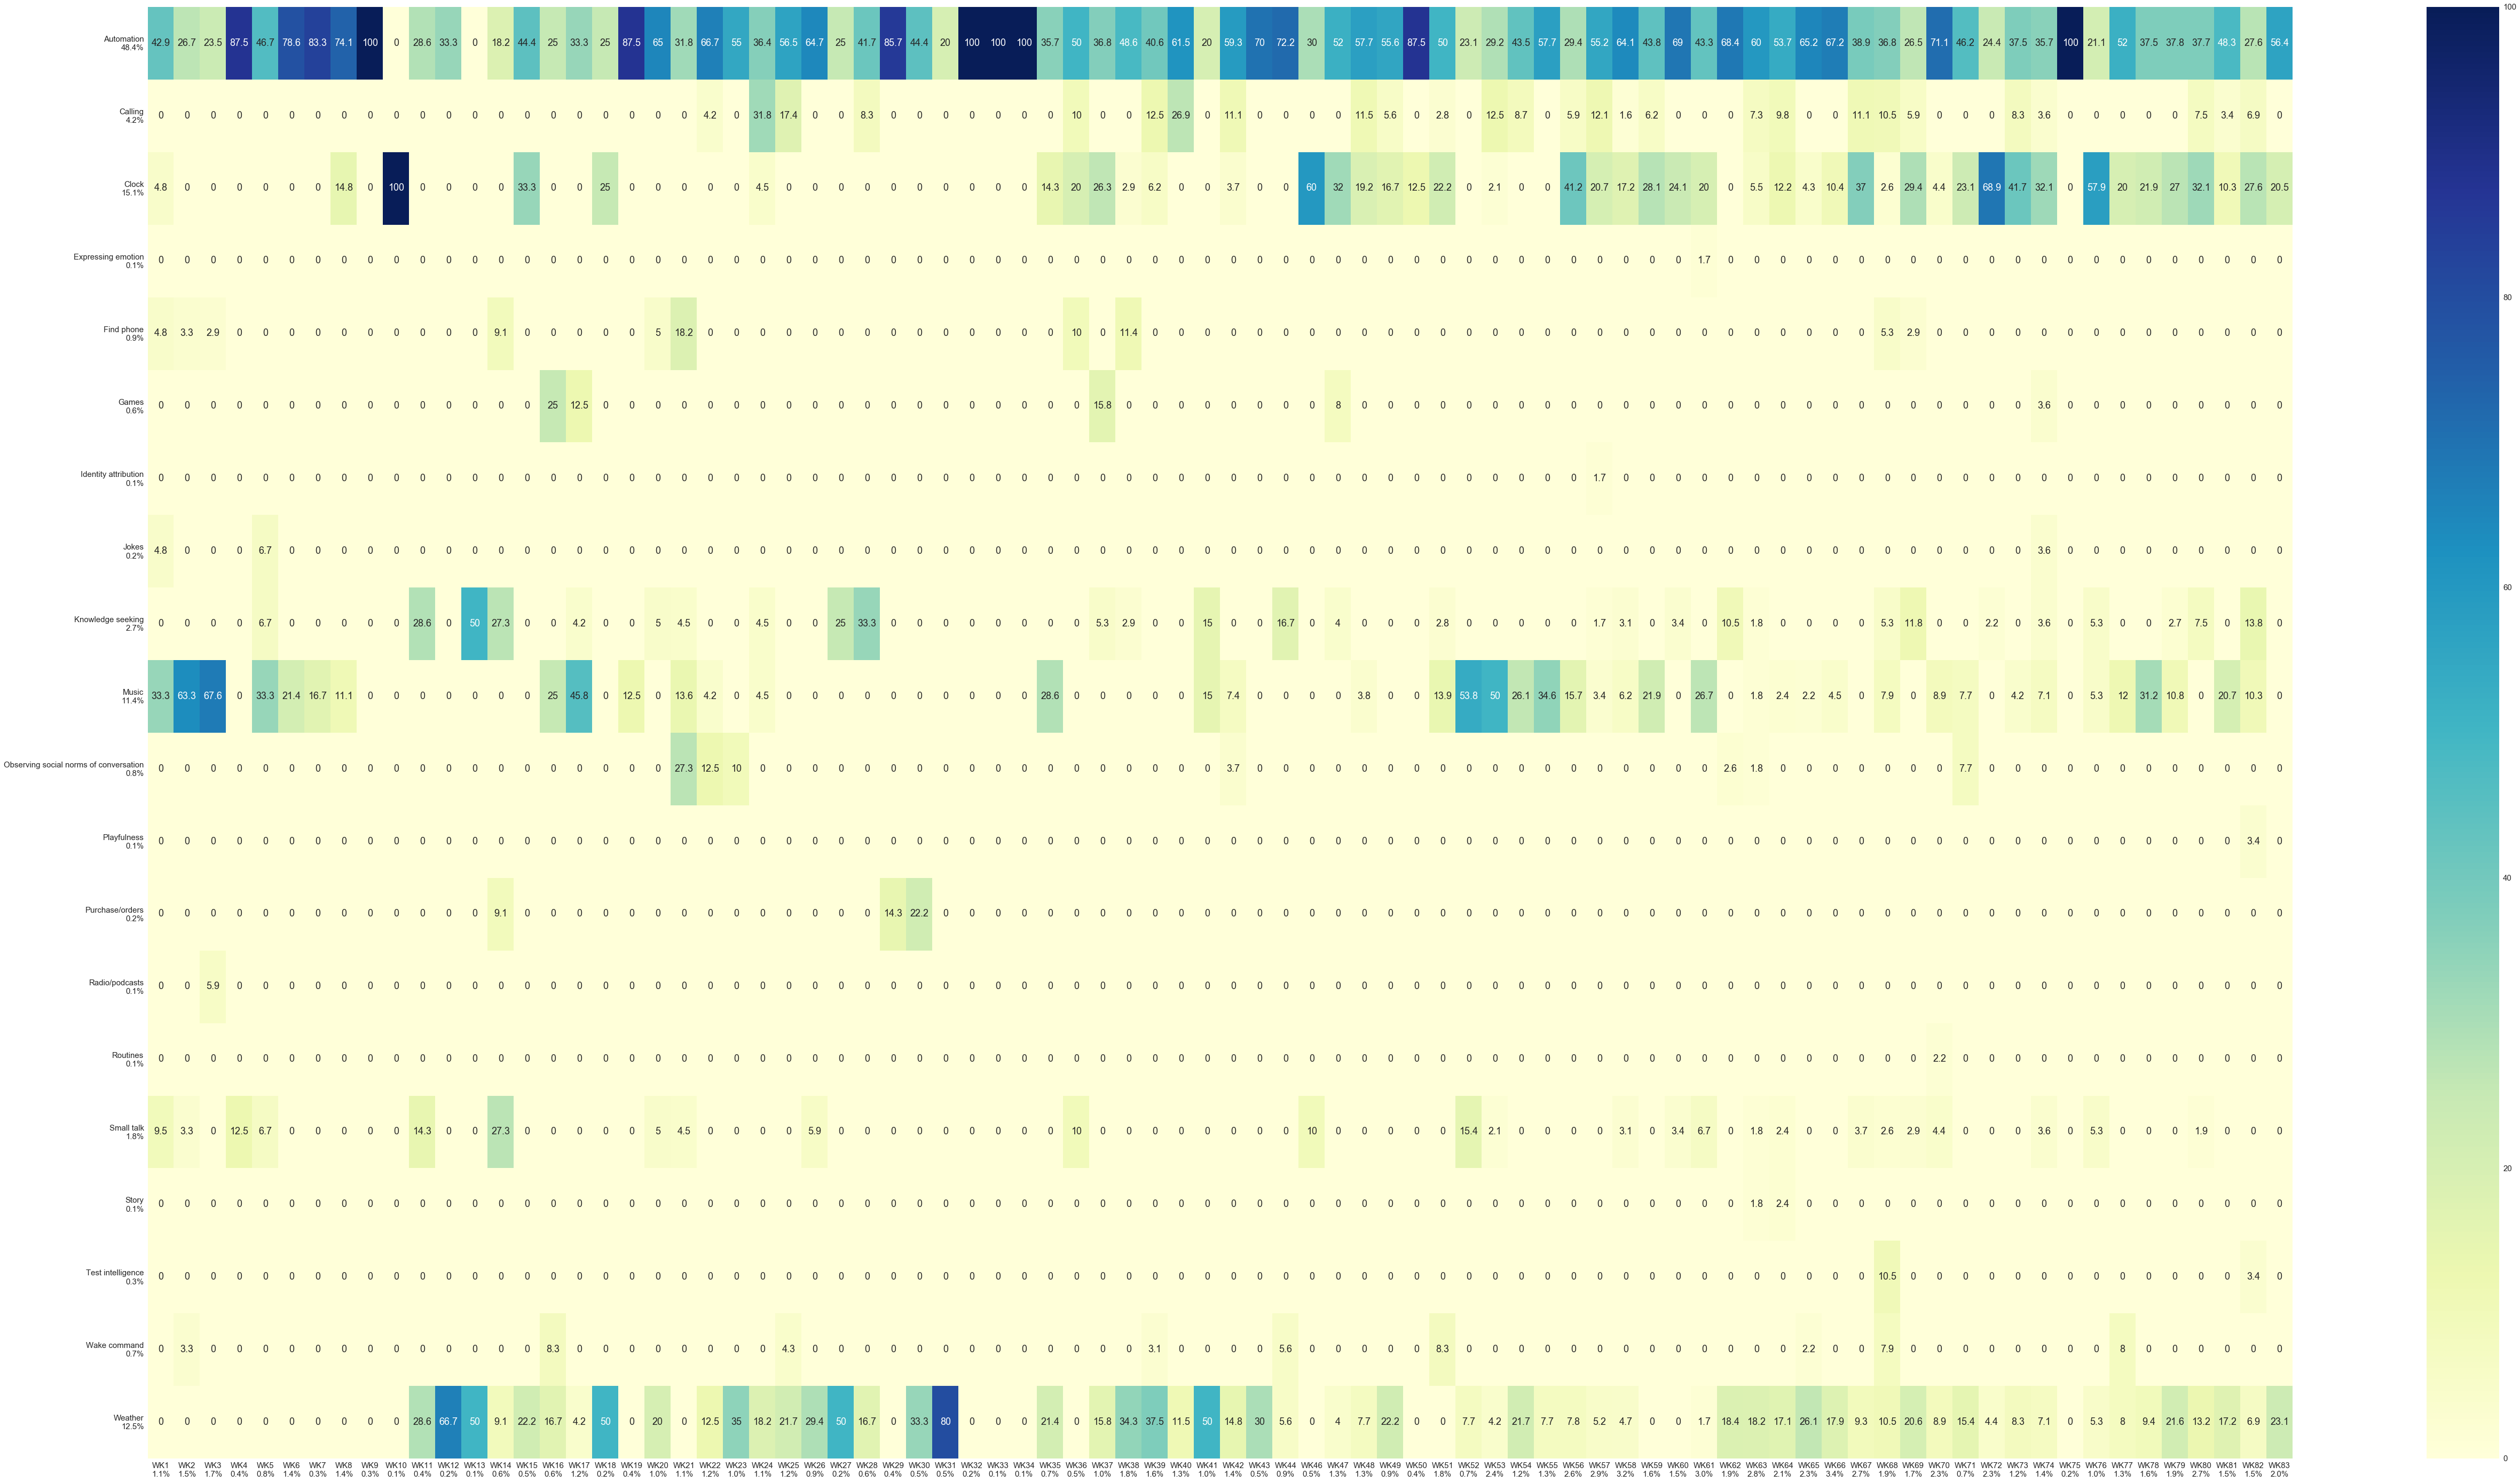

In [306]:
#code for generating visualization after getting final dataframe
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.5) #increase decrease font
plt.figure(figsize = (90,50)) #set figure size
ax = sns.heatmap(d1,vmin=0, annot=True,  fmt='g',vmax=100,cmap='YlGnBu')
#ylabels = [labels[i]+"\n"+str(round(values[i]*100,1))+"%" for i in range(len(labels)-1,-1,-1)]
ylabels = [ele+"\n"+newlabels[ele]+"%" for ele in newlabels]
ylabels.reverse()
print(ylabels)
xlabels = [str(Weeks[i])+"\n"+str(round(weekly_tots[i]*100,1))+"%" for i in range(len(weekly_tots)-1,-1,-1)]
print(xlabels)
ax.set_yticklabels(ylabels)
ax.set_xticklabels(xlabels)
ax.set_ylabel('')
plt.show()
f = ax.get_figure()
fig_name = id+'_'+people[index]+".pdf"
final_path = file_path+fig_name
f.savefig(final_path,bbox_inches='tight')

# No need to run this part for heatmaps

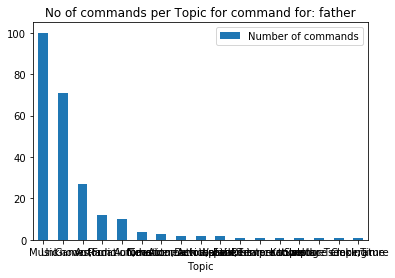

,Topic,Number of commands,person
0,Music,100,father
1,Unknown,71,father
2,Games;Fun,27,father
3,Radio,12,father
4,Automation;device,10,father
5,News,4,father
6,Automation;Device,3,father
7,Time to reach a place,2,father
8,Automation;speakers,2,father
9,Weather,2,father


In [45]:
flag = 0 
cur_data = data[data["Who"]==people[0]]["Topic"]
new_data =pd.DataFrame(cur_data.value_counts().reset_index())
new_data.columns = ['Topic', 'Number of commands']
new_data["person"] = people[0]

ax = new_data.plot.bar(x='Topic', y='Number of commands', title = 'No of commands per Topic for command for: '+people[0], rot=0)
plt.show()
for i in range(1,len(people)):
    cur_data = data[data["Who"]==people[i]]["Topic"]
    
    data_counts = pd.DataFrame(cur_data.value_counts().reset_index())
    data_counts.columns = ['Topic', 'Number of commands']
    data_counts["person"] = people[i]
    new_data = pd.concat([new_data,data_counts])

new_data
#new_data.to_csv("")


In [59]:
counts = pd.DataFrame(data["Topic"].value_counts().reset_index())
counts.columns = ['Topic', 'Number of commands']
counts

,Topic,Number of commands
0,music,130
1,unknown,71
2,games;fun,32
3,automation;device,13
4,radio,12
5,news,7
6,weather,4
7,clock;time,3
8,distance to a place,2
9,time to reach a place,2


In [60]:
topics = counts["Topic"].tolist()
topics

['music',
 'unknown',
 'games;fun',
 'automation;device',
 'radio',
 'news ',
 'weather',
 'clock;time',
 'distance to a place',
 'time to reach a place',
 'automation;speakers',
 'food',
 'failed interactions',
 'indoor temperature',
 'smalltalk',
 'sports',
 'knowledge seeking',
 'automation;temperature']

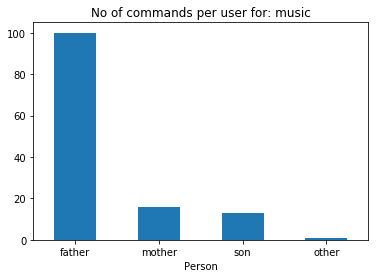

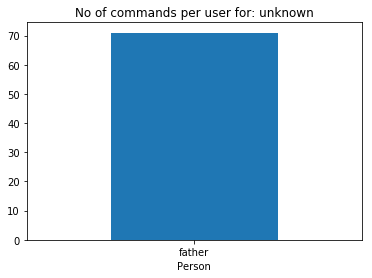

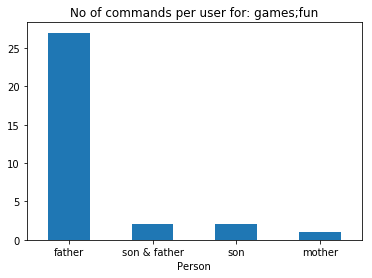

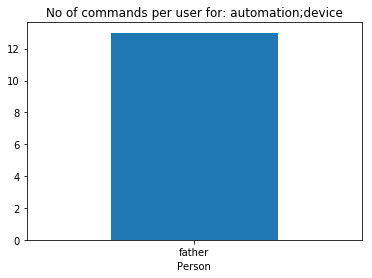

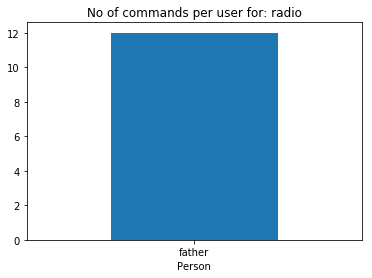

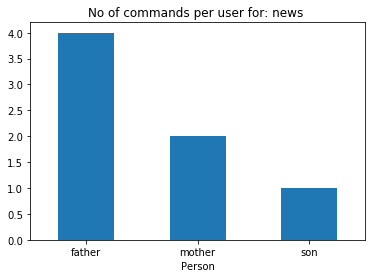

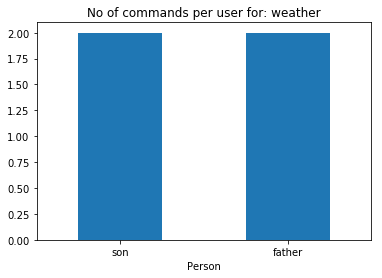

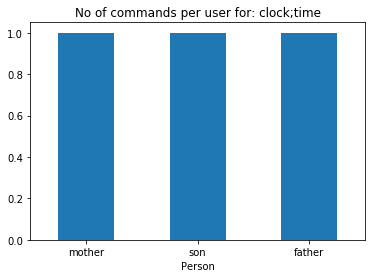

OSError: [Errno 22] Invalid argument: 'plot for clock;time.pdf'

In [63]:
import matplotlib.pyplot as plt
for i in range(0,len(topics)):
    
        cur_data = data[data["Topic"]==topics[i]]["Who"]
    
        data_counts = pd.DataFrame(cur_data.value_counts().reset_index())
        data_counts.columns = ['Person', 'Number of commands']
        
        ax = data_counts.plot.bar(x='Person', y='Number of commands', title = 'No of commands per user for: '+topics[i], legend = False, rot=0)
        plt.show()
        f = ax.get_figure()
        f.savefig("plot for "+topics[i]+".pdf")